# Inverse Kinematics

In this tutorial, we demonstrate how to use MAP-Elites to solve an inverse kinematics problem.

## Overview

Inverse kinematics is an important robotics problem in which, given a final robot configuration, one must figure out the actions to take to accomplish that position. (TODO: update this)

In this example, we will deal with a planar (2D) 12-DoF arm that needs to move its end effector to a certain position. Using MAP-Elites, we will find joint configurations that move the arm to a wide variety of positions.

## Setup

TODO: include ribs[all] ?

In [ ]:
import sys
!{sys.executable} -m pip install ribs[examples]

In [2]:
import time

import matplotlib.pyplot as plt
import numpy as np

from ribs.archives import CVTArchive
from ribs.emitters import IsoLineEmitter
from ribs.optimizers import Optimizer
from ribs.visualize import cvt_archive_heatmap

## Objective and Behavior Characteristics

In [3]:
def simulate(solutions, joint_lengths):
    """Returns the objective values and BCs for a batch of solutions."""
    n_dim = joint_lengths.shape[0]
    sums = np.sum(solutions, keepdims=True)
    objs = -np.sum(solutions - sums, axis=1) / n_dim

    cumsum = np.cumsum(solutions, axis=1)
    x_pos = joint_lengths[None] * np.cos(cumsum)
    y_pos = joint_lengths[None] * np.sin(cumsum)
    bcs = np.concatenate(
        (
            np.sum(x_pos, axis=1, keepdims=True),
            np.sum(y_pos, axis=1, keepdims=True),
        ),
        axis=1,
    )

    return objs, bcs

In [4]:
simulate(np.array([[0, 0, 0]]), np.array([1,1,1]))

(array([0.]), array([[3., 0.]]))

## Running MAP-Elites

TODO: plot archive size and fitness across iters, add in other algos?

In [5]:
dof = 12
joint_lengths = np.ones(dof) / dof
archive = CVTArchive([(-1, 1), (-1, 1)], 10000, use_kd_tree=True)
emitters = [
    IsoLineEmitter(np.zeros(dof),
                   archive,
                   iso_sigma=0.01,
                   line_sigma=0.2,
                   batch_size=64)
]
opt = Optimizer(archive, emitters)

In [6]:
start_time = time.time()
for i in range(2500):
    sols = opt.ask()
    objs, bcs = simulate(sols, joint_lengths)

    opt.tell(objs, bcs)

    if (i + 1) % 100 == 0:
        print(f"Finished {i + 1} itrs after {time.time() - start_time} s")

Finished 100 itrs after 0.8419187068939209 s
Finished 200 itrs after 1.3215348720550537 s
Finished 300 itrs after 1.7983531951904297 s
Finished 400 itrs after 2.257385015487671 s
Finished 500 itrs after 2.728515625 s
Finished 600 itrs after 3.1896939277648926 s
Finished 700 itrs after 3.659806251525879 s
Finished 800 itrs after 4.118035078048706 s
Finished 900 itrs after 4.586913585662842 s
Finished 1000 itrs after 5.054602384567261 s
Finished 1100 itrs after 5.514532089233398 s
Finished 1200 itrs after 5.985900402069092 s
Finished 1300 itrs after 6.481847763061523 s
Finished 1400 itrs after 7.058067083358765 s
Finished 1500 itrs after 7.662463903427124 s
Finished 1600 itrs after 8.226601839065552 s
Finished 1700 itrs after 8.74492883682251 s
Finished 1800 itrs after 9.243915557861328 s
Finished 1900 itrs after 9.73898196220398 s
Finished 2000 itrs after 10.290866136550903 s
Finished 2100 itrs after 10.887513637542725 s
Finished 2200 itrs after 11.425798177719116 s
Finished 2300 itrs a

(<Figure size 1152x864 with 2 Axes>, <AxesSubplot:>)

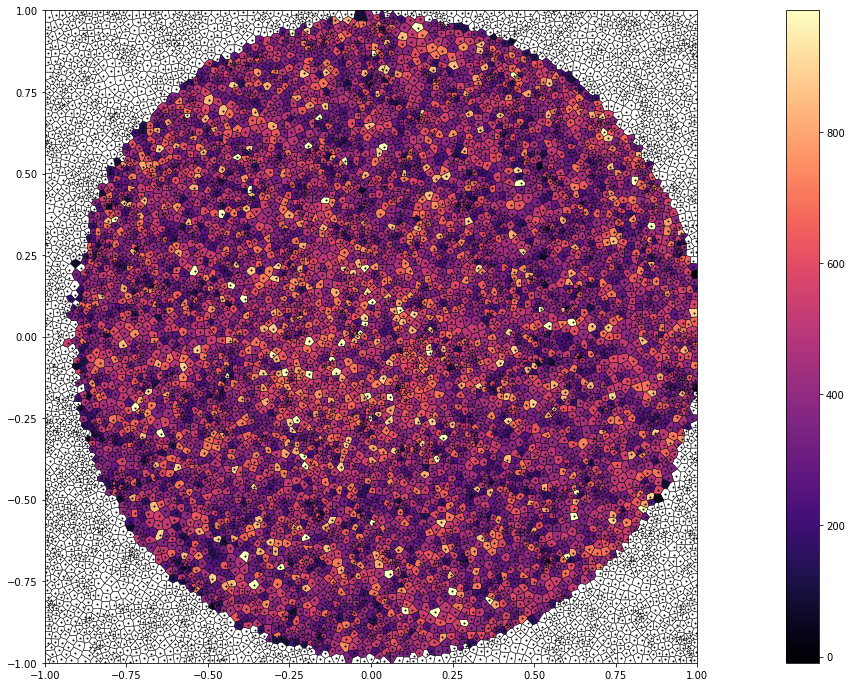

In [12]:
cvt_archive_heatmap(archive, figsize=(16, 12))

## Visualization

Here we visualize several randomly selected elites in the archive.

In [8]:
def visualize(angles, joint_lengths, ax):
    """Plots an arm with the given angles and joint lengths on ax.
    
    angles and joint_lengths are assumed to be the same length.
    """
    ax.set_aspect("equal")
    lim = 1.05 * np.sum(joint_lengths)
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

    cumsum = np.cumsum(angles)
    pos = np.array([0, 0])
    for i in range(len(angles)):
        next_pos = pos + joint_lengths[i] * np.array(
            [np.cos(cumsum[i]), np.sin(cumsum[i])])
        ax.plot([pos[0], next_pos[0]], [pos[1], next_pos[1]], "-ko", ms=3)
        pos = next_pos
    ax.plot(0, 0, "ro", ms=6)
    final_label = f"Final: ({pos[0]:.2f}, {pos[1]:.2f})"
    ax.plot(pos[0], pos[1], "go", ms=6, label=final_label)
    ax.legend()

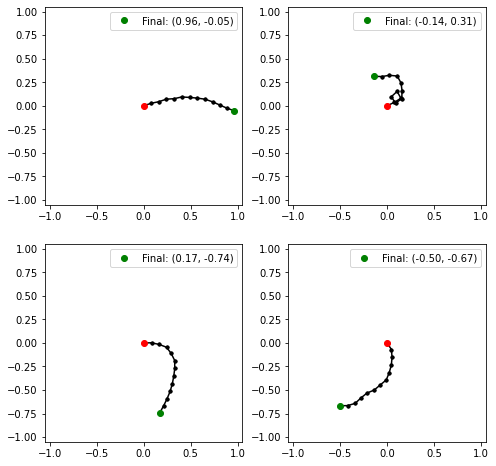

In [9]:
fig, ax = plt.subplots(2,2, figsize=(8, 8))
ax = ax.flatten()
for i in range(len(ax)):
    visualize(archive.get_random_elite()[0], joint_lengths, ax[i])

## Analyzing Results

Here, we will print out all the solutions we found.

## Conclusion

In this tutorial, we...